In [513]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sales Performance Analysis

In [515]:
df = pd.read_csv("../data/raw/sales.csv")

In [516]:
# converting object type to datetime

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

In [517]:
# formatting product_category string

df['product_category'] = df['product_category'].str.upper()

### Total revenue yearly

In [519]:
years = df.groupby(df['order_purchase_timestamp'].dt.year)
revenue_yearly = years['total_revenue'].sum().reset_index().rename(columns={'order_purchase_timestamp': 'year'})

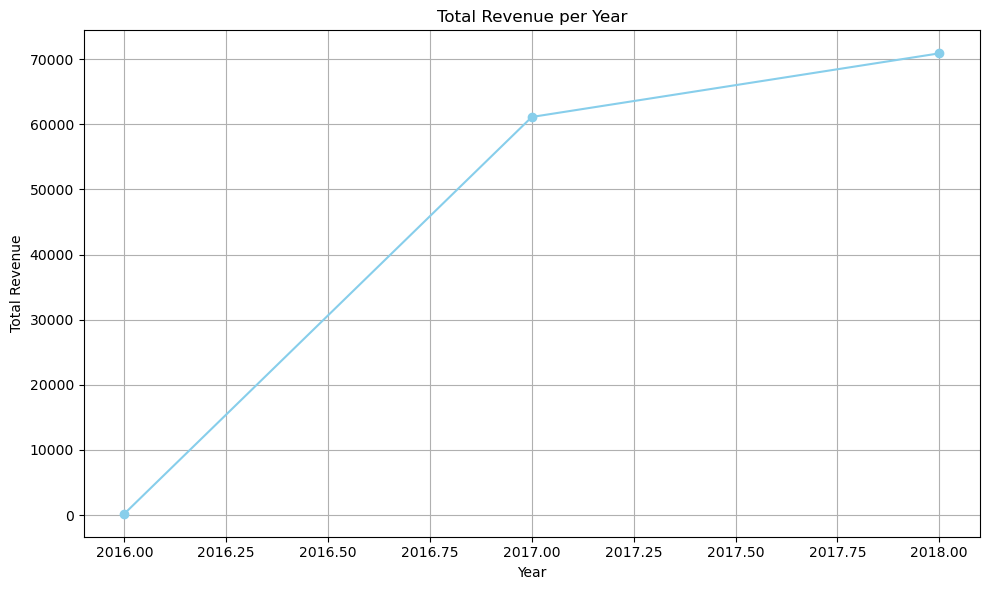

In [520]:
plt.figure(figsize=(10, 6))
plt.plot(revenue_yearly['year'], revenue_yearly['total_revenue'], marker='o', linestyle='-', color='skyblue')
plt.title('Total Revenue per Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

### Top 10 best-selling products

In [522]:
top_products = df['product_id'].value_counts().head(10).reset_index()
top_products.columns = ['product_id', 'qty_sold']

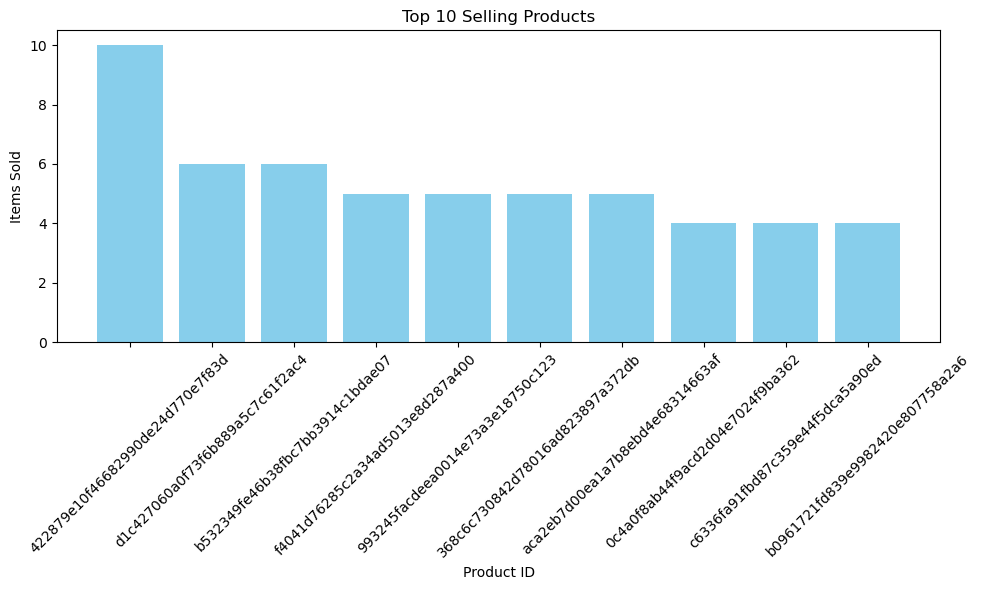

In [523]:
plt.figure(figsize=(10,6))
plt.bar(top_products['product_id'], top_products['qty_sold'], color='skyblue')

plt.title('Top 10 Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Items Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top sellers by revenue

In [525]:
top_sellers = df.groupby(df['seller_id'])['total_revenue'].sum().sort_values(ascending=False).head().reset_index()

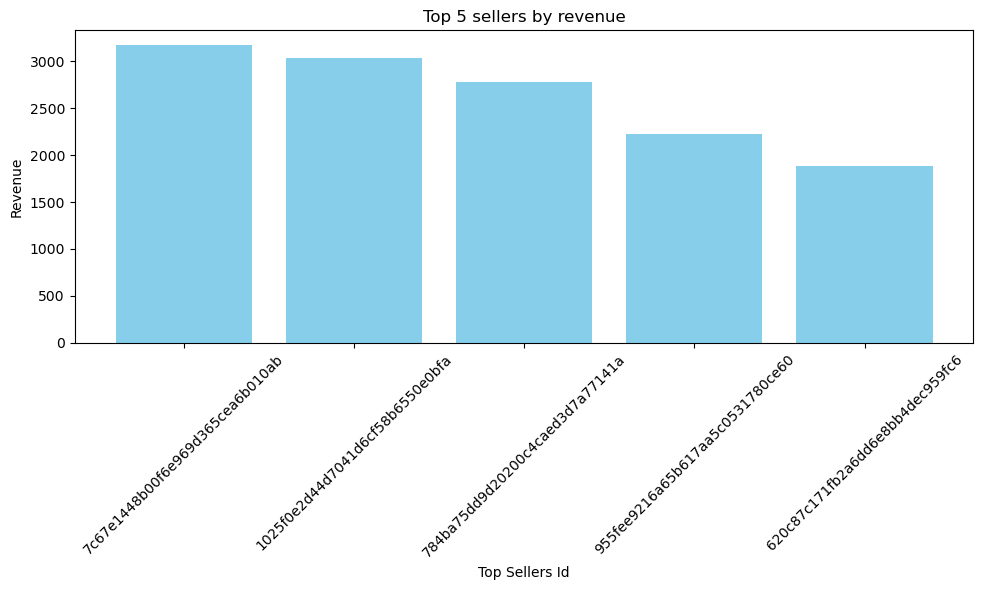

In [526]:
plt.figure(figsize=(10,6))
plt.bar(top_sellers['seller_id'], top_sellers['total_revenue'], color='skyblue')

plt.xlabel('Top Sellers Id')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.title('Top 5 sellers by revenue')
plt.tight_layout()
plt.show()

### Revenue by product category

In [528]:
top_category = df.groupby('product_category')['total_revenue'].sum().sort_values(ascending=False).head().reset_index()

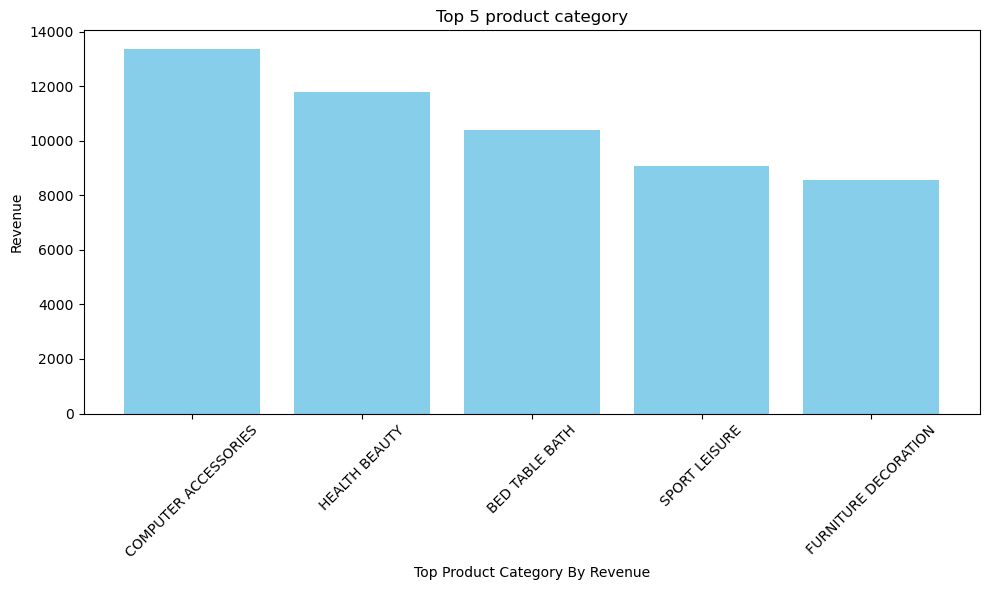

In [529]:
plt.figure(figsize=(10,6))
plt.bar(top_category['product_category'], top_category['total_revenue'], color='skyblue')

plt.xlabel('Top Product Category By Revenue')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.title('Top 5 product category')
plt.tight_layout()
plt.show()

### Monthly sales trend

In [550]:
months = df.groupby(df['order_purchase_timestamp'].dt.month_name())
monthly_sales = months['total_revenue'].sum().reset_index()
monthly_sales.columns = ['months', 'revenue']

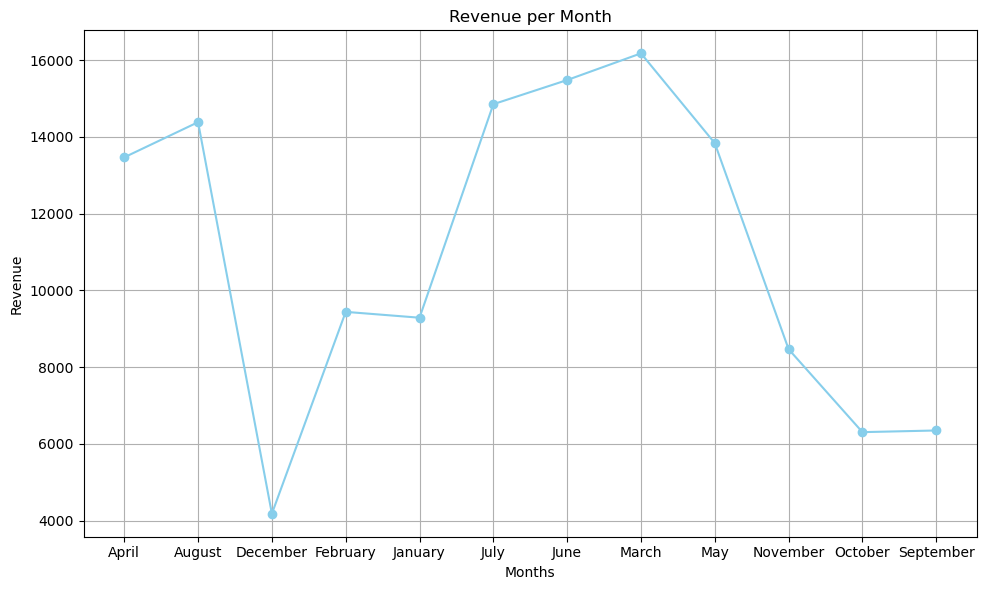

In [533]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['months'], monthly_sales['revenue'], marker='o', linestyle='-', color='skyblue')
plt.title('Revenue per Month')
plt.xlabel('Months')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()